#Packages

In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set()
warnings.filterwarnings("ignore")

#import f2 as func

#DATA

In [5]:
stocks=["^IBEX","CLNX.MC","FER.MC","TEF.MC","CABK.MC","ITX.MC","AMS.MC","ANA.MC","ENC.MC","ACS.MC","BBVA.MC","ELE.MC","GRF.MC","VIS.MC","ACX.MC","IBE.MC","MEL.MC","NTGY.MC","ENG.MC","MRL.MC","AENA.MC","MAP.MC","MTS.MC","SAN.MC","SAB.MC","COL.MC","BKT.MC","IAG.MC"]

In [6]:
raw_data = yfinance.download (tickers = ' '.join(stocks), #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "2018-12-31", #The starting date of our data set
                              end = "2019-12-31", #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1d", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day.
                              group_by = 'ticker', #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period.
                              )
# /treads = True) #Whether to use threads for mass downloading.

[*********************100%***********************]  28 of 28 completed


In [7]:
raw_data.head()

Ticker                        GRF.MC                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2018-12-31 00:00:00+00:00  22.091854  22.246275  21.898829  22.101505   
2019-01-02 00:00:00+00:00  21.773359  21.937431  21.406610  21.937431   
2019-01-03 00:00:00+00:00  21.927779  22.130457  21.715451  22.014641   
2019-01-04 00:00:00+00:00  22.284882  23.028033  22.014644  22.748144   
2019-01-07 00:00:00+00:00  22.767446  22.844656  22.497209  22.728840   

Ticker                                BKT.MC                                \
Price                       Volume      Open      High       Low     Close   
Date                                                                         
2018-12-31 00:00:00+00:00   207327  3.625005  3.690207  3.605024  3.690207   
2019-01-02 00:00:00+00:00   488978  3.649192  3.687051  3.575577  3.670225   
2019-01-03 00:00:00+00:00  3948479  3.643934  3.691257  3.617642  3.650243   
2019-01-04 00:00:00+00:00   853831  3.675482  3.780646  3.668121  3.763820   
2019-01-07 00:00:00+00:00   387963  3.761717  3.789060  3.729116  3.761717   

Ticker                              ...     MTS.MC                        \
Price                       Volume  ...       Open       High        Low   
Date                                ...                                    
2018-12-31 00:00:00+00:00  1004254  ...  16.876578  16.987584  16.697118   
2019-01-02 00:00:00+00:00  1693833  ...  16.637914  16.706367  15.790570   
2019-01-03 00:00:00+00:00  2975539  ...  16.201293  16.315999  15.927479   
2019-01-04 00:00:00+00:00  2396190  ...  16.280848  17.178144  16.245696   
2019-01-07 00:00:00+00:00  3698789  ...  17.383501  17.672117  17.170741   

Ticker                                           AENA.MC              \
Price                          Close  Volume        Open        High   
Date                                                                   
2018-12-31 00:00:00+00:00  16.817375  298355  115.945960  117.050615   
2019-01-02 00:00:00+00:00  16.343748  932807  114.501417  117.263047   
2019-01-03 00:00:00+00:00  16.021833  390877  115.945951  118.240225   
2019-01-04 00:00:00+00:00  17.052338  714570  117.135590  119.769752   
2019-01-07 00:00:00+00:00  17.377951  489835  119.812236  119.897215   

Ticker                                                     
Price                             Low       Close  Volume  
Date                                                       
2018-12-31 00:00:00+00:00  115.351151  115.351151   63452  
2019-01-02 00:00:00+00:00  113.821629  116.413315  143458  
2019-01-03 00:00:00+00:00  115.903462  116.455795  461151  
2019-01-04 00:00:00+00:00  117.008122  119.387375  110214  
2019-01-07 00:00:00+00:00  117.432984  118.240227   92663  

[5 rows x 140 columns]

In [9]:
#Close values
data=np.zeros((raw_data.shape[0],len(stocks)))
data
for i,j in enumerate(stocks):
  data[:,i]=raw_data[j]['Close']
data=pd.DataFrame(data)
data.columns=stocks
data.index=raw_data.index
data[:3]

,^IBEX,CLNX.MC,FER.MC,TEF.MC,CABK.MC,ITX.MC,AMS.MC,ANA.MC,ENC.MC,ACS.MC,...,ENG.MC,MRL.MC,AENA.MC,MAP.MC,MTS.MC,SAN.MC,SAB.MC,COL.MC,BKT.MC,IAG.MC
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31 00:00:00+00:00,8539.900391,16.891943,15.276575,4.787933,2.322074,19.411121,57.512077,61.271458,3.999515,22.164583,...,14.889722,7.801912,115.351151,1.550270,16.817375,3.108411,0.773665,6.648861,3.690207,4.292945
2019-01-02 00:00:00+00:00,8550.000000,17.050371,15.289520,4.831645,2.296388,19.480604,58.079254,62.017658,3.981285,21.778028,...,15.154598,7.791060,116.413315,1.533565,16.343748,3.111931,0.774052,6.554870,3.670225,4.146538
2019-01-03 00:00:00+00:00,8523.299805,17.238985,15.367225,4.911888,2.294920,19.202682,54.884140,63.294483,3.879200,21.830442,...,15.343794,7.725954,116.455795,1.540915,16.021833,3.136967,0.771423,6.571216,3.650243,4.008816


In [19]:
#returns
returns=data.pct_change(1)
returns=returns[1:]

ibex=returns.iloc[:,0]
returns=returns.iloc[:,1:]
returns[:5]

,CLNX.MC,FER.MC,TEF.MC,CABK.MC,ITX.MC,AMS.MC,ANA.MC,ENC.MC,ACS.MC,BBVA.MC,...,ENG.MC,MRL.MC,AENA.MC,MAP.MC,MTS.MC,SAN.MC,SAB.MC,COL.MC,BKT.MC,IAG.MC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,0.009379,0.000847,0.009129,-0.011062,0.003580,0.009862,0.012179,-0.004558,-0.017440,0.006040,...,0.017789,-0.001391,0.009208,-0.010776,-0.028163,0.001132,0.000499,-0.014136,-0.005415,-0.034104
2019-01-03 00:00:00+00:00,0.011062,0.005082,0.016608,-0.000639,-0.014267,-0.055013,0.020588,-0.025641,0.002407,0.002680,...,0.012484,-0.008357,0.000365,0.004793,-0.019697,0.008045,-0.003396,0.002494,-0.005444,-0.033214
2019-01-04 00:00:00+00:00,0.010503,0.012079,0.013017,0.038375,0.035278,0.034447,0.003668,0.060150,0.015006,0.037318,...,0.002055,0.010768,0.025173,0.028188,0.064319,0.037411,0.046512,0.016791,0.031115,0.021046
2019-01-07 00:00:00+00:00,0.028584,0.007494,0.009047,0.005852,0.007864,0.009324,0.006787,0.001773,0.003253,-0.003505,...,-0.000820,0.001390,-0.009609,-0.000422,0.019095,0.005650,0.003352,0.014679,-0.000559,0.007275
2019-01-08 00:00:00+00:00,-0.002105,0.009642,-0.001559,0.001837,0.021673,0.025404,0.014260,0.009734,0.010316,0.008482,...,0.013957,0.023127,0.006109,-0.001266,0.022996,0.008247,0.000956,0.020494,0.011462,0.000301


#EDA

In [11]:
#nulls
print('Nulls: {}'.format(returns.isnull().sum().sum()))

#RESAMPLE TO BUSINESS OK
days_year=returns.shape[0]
print('Days: {}'.format(days_year))

Nulls: 0
Days: 255


In [29]:
r=returns.iloc[:,0]
r
# (r+1).loc[:'2019-01-03'].prod()

,CLNX.MC
Date,
2019-01-02 00:00:00+00:00,0.009379
2019-01-03 00:00:00+00:00,0.011062
2019-01-04 00:00:00+00:00,0.010503
2019-01-07 00:00:00+00:00,0.028584
2019-01-08 00:00:00+00:00,-0.002105
...,...
2019-12-23 00:00:00+00:00,0.017701
2019-12-24 00:00:00+00:00,-0.003115
2019-12-25 00:00:00+00:00,0.000000


In [32]:
r.loc[:'2019-01-03'].prod()

0.00010375109712479313

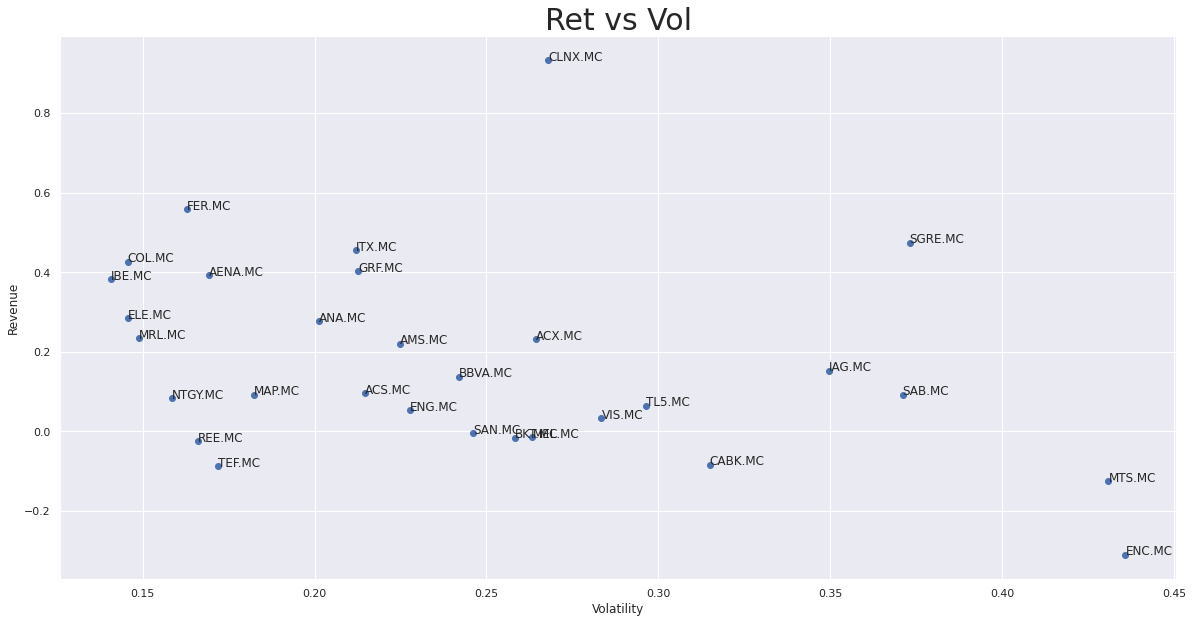

In [ ]:
ret_ann=func.annual_ret(returns,255).values
vol_ann=func.annual_vol(returns,255).values

fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(vol_ann,ret_ann)
ax.set_ylabel('Revenue')
ax.set_xlabel('Volatility')
ax.set_title('Ret vs Vol', fontsize=30)
for i, txt in enumerate(stocks[1:]):
  ax.annotate(txt, (vol_ann[i],ret_ann[i]))


###Wealth index

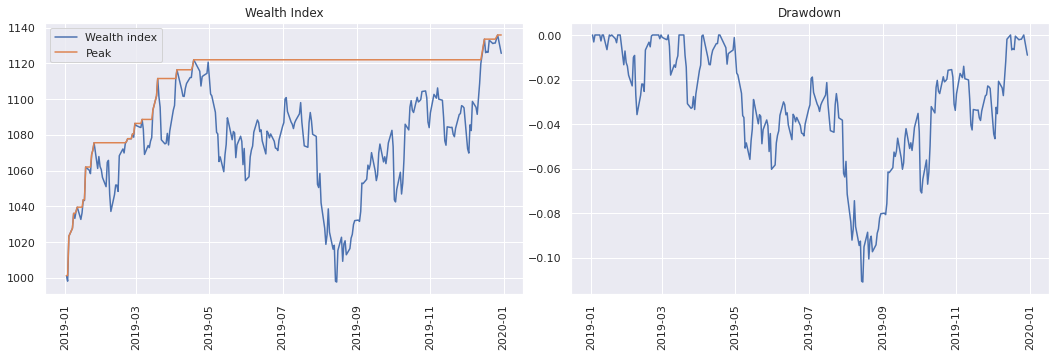

In [ ]:
wealth=func.drawdown(ibex)

plt.figure(figsize=(18,5))
plt.subplot(1,2,1,title='Wealth Index')
plt.plot(wealth.iloc[:,0],label='Wealth index')
plt.plot(wealth.iloc[:,1],label='Peak')
plt.xticks(rotation=90)
plt.legend(loc='best')
#plt.tite('')
plt.subplots_adjust(wspace=0.1)

plt.subplot(1,2,2,title='Drawdown')
plt.plot(wealth.iloc[:,-1])
plt.xticks(rotation=90)
plt.show()



###Efficient **frontier**

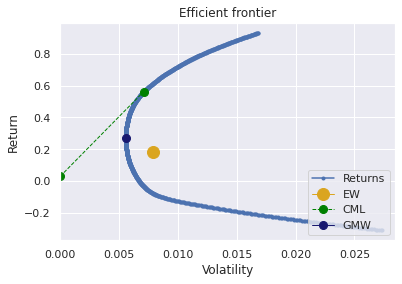

In [ ]:
n_points=1000
er=func.annual_ret(returns,255)
cov=returns.cov()
func.plot_ef(n_points,er,cov,riskfree_rate=0.03,show_gmw=True,show_ew=True,show_cml=True)


###Summary

In [ ]:
func.summary_stats(returns,rf=0.03,periods_per_year=255)

,Annual Ret,Annual Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Historic VaR (5%),Cornish-Fisher VaR (5%)
CLNX.MC,0.932147,0.268001,3.268644,-0.120252,0.532648,4.088690,0.020918,0.021880
FER.MC,0.558296,0.162937,3.148321,-0.073770,-0.522551,4.861624,0.014744,0.016070
REE.MC,-0.024642,0.166051,-0.319527,-0.127558,-0.067242,3.723071,0.016861,0.017194
TEF.MC,-0.088257,0.172002,-0.667588,-0.220689,-0.393349,3.587462,0.018239,0.019066
CABK.MC,-0.084452,0.314998,-0.352815,-0.389950,0.147200,4.317827,0.030760,0.031240
ITX.MC,0.455394,0.211993,1.948446,-0.126815,-0.044660,4.252181,0.019855,0.020108
AMS.MC,0.220043,0.224950,0.820306,-0.161613,-0.339578,4.311632,0.022227,0.023248
ANA.MC,0.276725,0.201299,1.190105,-0.152791,-0.706120,5.071039,0.022259,0.021582
ENC.MC,-0.309847,0.435914,-0.757000,-0.541854,-0.149068,3.642339,0.046323,0.046771
ACS.MC,0.095374,0.214658,0.295702,-0.167129,-0.690739,4.044869,0.024574,0.023898


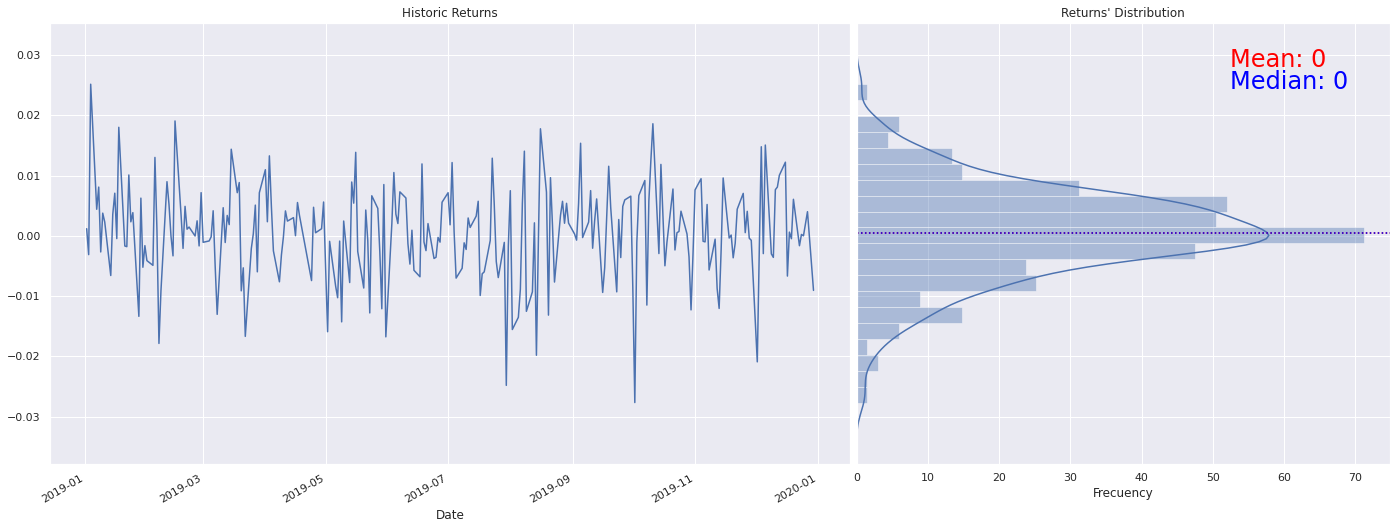

In [ ]:
func.plot_1(ibex)

In [ ]:
a=[1,2,3]

In [ ]:
a[1]

2

In [ ]:
def mydecorator(f):
    def wrapper(*args,**kwargs):
        print('aaaa')
        f(*args,**kwargs)
        print('bb')
    return wrapper

@mydecorator
def  number1(name):
    print(name)

def int_decorator_1(f):
    def inner_mult():
        print('dec 1')
        return math.ceil(f()*2.5)
    return inner_mult

def int_decorator_2(f):
    def inner_div():
        print('dec 2')
        return math.floor(f()*0.5)
    return inner_div

@int_decorator_2
@int_decorator_1
def f():
    return 2

print(f()) #the result is 2


dec 2
dec 1
2


In [ ]:
import math

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
n=100
x1=np.linspace(0,1,n)
x2=np.linspace(0,1,n)
f1=1-np.exp(-4*x1)*np.sin(6*np.pi*x1)
g=1+9*np.power((x1+x2)/1,1/4)
f2=g*(1-np.square(x1/g))

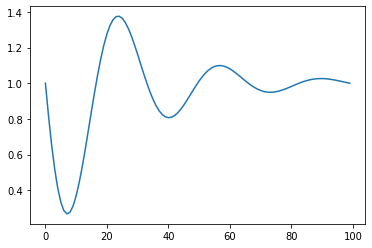

In [ ]:
plt.plot(f1)

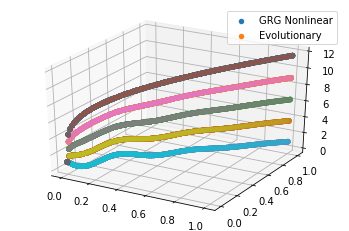

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(20):
    ax.scatter(x1, x2, 0*f1+1*f2)
    ax.scatter(x1, x2, 0.25*f1+0.75*f2)
    ax.scatter(x1, x2, 0.5*f1+0.5*f2)
    ax.scatter(x1, x2, 0.75*f1+0.25*f2)
    ax.scatter(x1, x2, 1*f1+0*f2)
    #ax.scatter(x1, x2, f2)
plt.legend(['GRG Nonlinear','Evolutionary'])

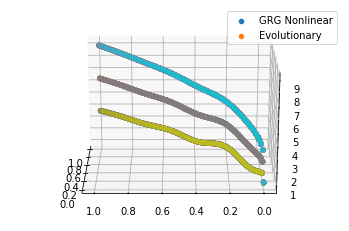

In [ ]:
ax.view_init(20, 180)
fig